In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [5]:
# Đọc tệp processed_transactions.csv
transactions_df = pd.read_csv('/content/gdrive/MyDrive/FINALPROJECT/[Project1]_DL07_K302_NguyenManhDuc_NguyenBuiThanhTruc /Processed_transactions.csv')

# Kiểm tra thông tin ban đầu
print("Thông tin giao dịch:")
print(transactions_df.head())

# Chuyển cột 'Date' thành kiểu datetime
transactions_df['Date'] = pd.to_datetime(transactions_df['Date'], format='%Y-%m-%d')

Thông tin giao dịch:
   Member_number        Date  productId  items  total_spent  \
0           1808  2015-07-21          1      3         23.4   
1           2552  2015-01-05          2      1          1.8   
2           2300  2015-09-19          3      3          9.0   
3           1187  2015-12-12          4      3          2.4   
4           3037  2015-02-01          2      1          1.8   

   product_price_trans productName_trans    Category  
0                  7.8    tropical fruit  Fresh Food  
1                  1.8        whole milk       Dairy  
2                  3.0         pip fruit  Fresh Food  
3                  0.8  other vegetables  Fresh Food  
4                  1.8        whole milk       Dairy  


# 1. Phân tích hành vi mua hàng

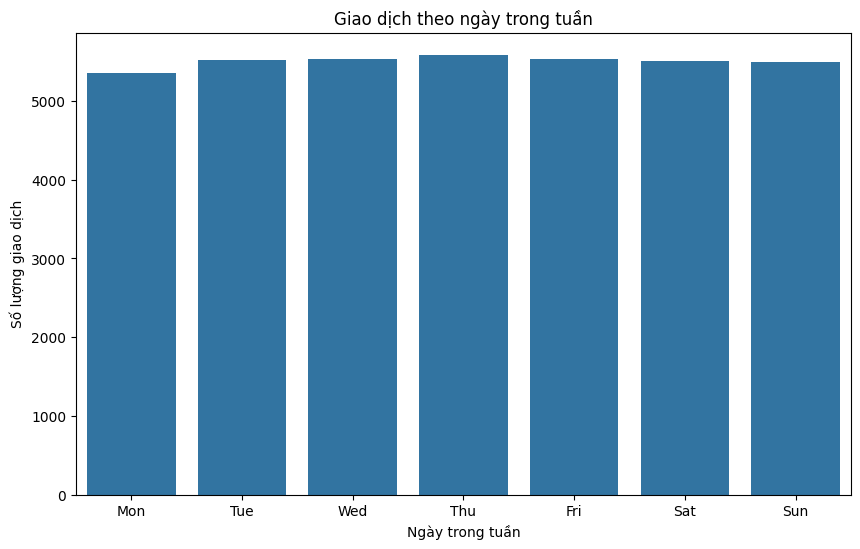

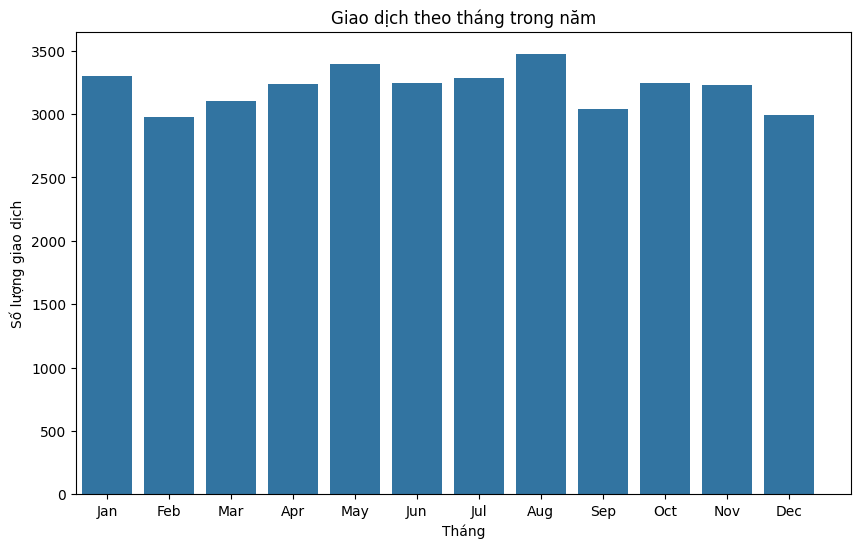

In [11]:
# a) Khách hàng mua sắm vào thời gian nào trong ngày và trong tuần
transactions_df['DayOfWeek'] = transactions_df['Date'].dt.dayofweek  # 0: Monday, 6: Sunday
transactions_df['Month'] = transactions_df['Date'].dt.month  # 1: January, 12: December

# Phân tích giao dịch theo ngày trong tuần
day_sales = transactions_df.groupby('DayOfWeek').size().reset_index(name='TransactionCount')

# Phân tích giao dịch theo tháng trong năm
monthly_sales = transactions_df.groupby('Month').size().reset_index(name='TransactionCount')

# Vẽ biểu đồ giao dịch theo ngày trong tuần
plt.figure(figsize=(10,6))
sns.barplot(x='DayOfWeek', y='TransactionCount', data=day_sales)
plt.title('Giao dịch theo ngày trong tuần')
plt.xlabel('Ngày trong tuần')
plt.ylabel('Số lượng giao dịch')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Vẽ biểu đồ giao dịch theo tháng trong năm
plt.figure(figsize=(10,6))
sns.barplot(x='Month', y='TransactionCount', data=monthly_sales)
plt.title('Giao dịch theo tháng trong năm')
plt.xlabel('Tháng')
plt.ylabel('Số lượng giao dịch')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
# b) Tỷ lệ khách hàng tái mua và thời gian giữa các lần mua
# Tính ngày đầu tiên của mỗi khách hàng
first_purchase = transactions_df.groupby('Member_number')['Date'].min().reset_index(name='FirstPurchase')

# Merge lại với dữ liệu gốc để xác định các lần mua sau lần đầu tiên và đổi tên cột trùng
transactions_df = transactions_df.merge(first_purchase, on='Member_number', suffixes=('', '_First'))

# Tính khoảng cách thời gian giữa lần mua và lần mua đầu tiên
transactions_df['DaysSinceFirstPurchase'] = (transactions_df['Date'] - transactions_df['FirstPurchase']).dt.days

# Xác định khách hàng tái mua (có mua sau ít nhất 1 ngày)
repeat_customers = transactions_df[transactions_df['DaysSinceFirstPurchase'] > 0]

# Tính tỷ lệ tái mua
repeat_customer_rate = repeat_customers['Member_number'].nunique() / transactions_df['Member_number'].nunique()

print(f"Tỷ lệ khách hàng tái mua: {repeat_customer_rate * 100:.2f}%")


Tỷ lệ khách hàng tái mua: 91.05%


# 2. Phân tích các sản phẩm bán chạy và lợi nhuận

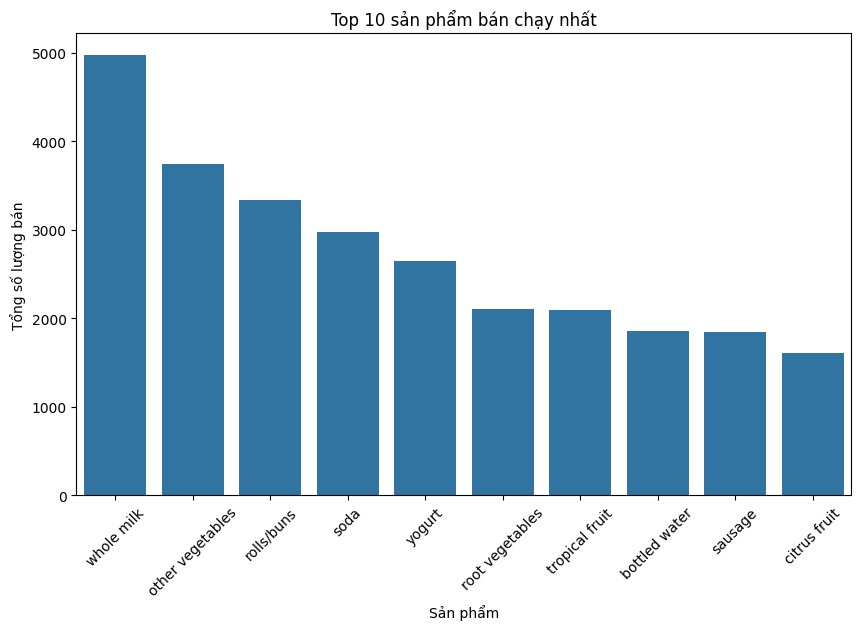

In [7]:
# a) Các sản phẩm bán chạy nhất
product_sales = transactions_df.groupby('productName_trans')['items'].sum().reset_index(name='TotalSales')
product_sales_sorted = product_sales.sort_values('TotalSales', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='productName_trans', y='TotalSales', data=product_sales_sorted.head(10),
            order=product_sales_sorted['productName_trans'].head(10))
plt.title('Top 10 sản phẩm bán chạy nhất')
plt.xlabel('Sản phẩm')
plt.ylabel('Tổng số lượng bán')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-14f007fb859d>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_revenue = transactions_df.groupby('productName_trans').apply(lambda x: (x['items'] * x['product_price_trans']).sum()).reset_index(name='Revenue')


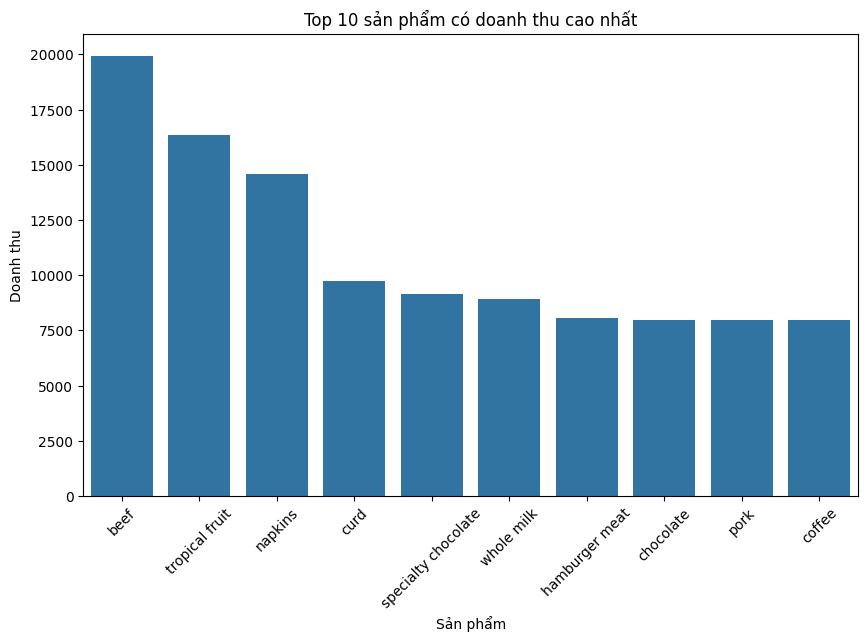

In [9]:
# b) Các sản phẩm có doanh thu cao nhất
product_revenue = transactions_df.groupby('productName_trans').apply(lambda x: (x['items'] * x['product_price_trans']).sum()).reset_index(name='Revenue')
product_revenue_sorted = product_revenue.sort_values('Revenue', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='productName_trans', y='Revenue', data=product_revenue_sorted.head(10),
            order=product_revenue_sorted['productName_trans'].head(10))
plt.title('Top 10 sản phẩm có doanh thu cao nhất')
plt.xlabel('Sản phẩm')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.show()



# 3. Phân tích dòng tiền

<ipython-input-25-78578e8aa5e3>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_revenue = transactions_df.groupby('Month').apply(lambda x: (x['items'] * x['product_price']).sum()).reset_index(name='Revenue')


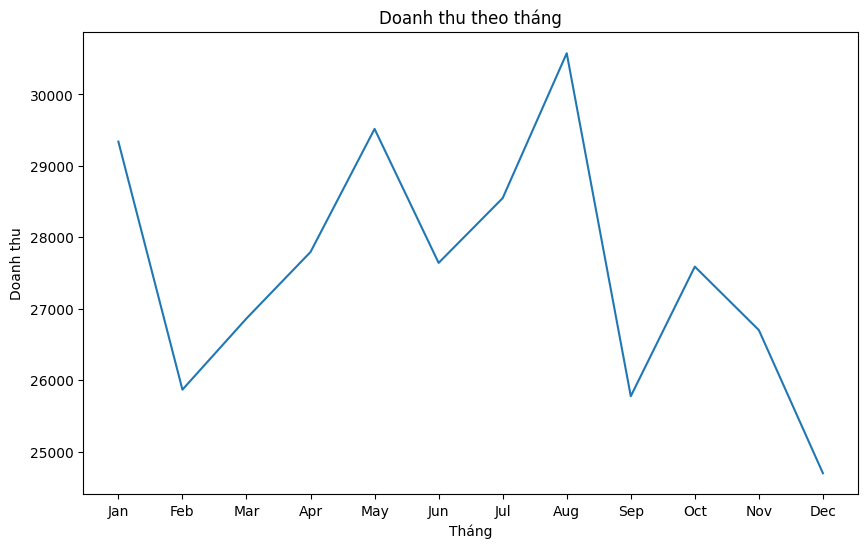

In [ ]:
# a) Doanh thu theo tháng
monthly_revenue = transactions_df.groupby('Month').apply(lambda x: (x['items'] * x['product_price_trans']).sum()).reset_index(name='Revenue')

# Hiển thị doanh thu theo tháng
plt.figure(figsize=(10,6))
sns.lineplot(x='Month', y='Revenue', data=monthly_revenue)
plt.title('Doanh thu theo tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [12]:
# b) Sản phẩm bán chạy nhất trong từng tháng
# Nhóm dữ liệu theo tháng và sản phẩm, tính tổng số lượng bán của từng sản phẩm trong mỗi tháng
monthly_product_sales = transactions_df.groupby(['Month', 'productName_trans'])['items'].sum().reset_index()

# Sắp xếp theo tháng và số lượng bán, rồi chọn sản phẩm có số lượng bán cao nhất trong mỗi tháng
top_monthly_products = monthly_product_sales.sort_values(['Month', 'items'], ascending=[True, False]).groupby('Month').head(1)
print(top_monthly_products)


      Month productName_trans  items
148       1        whole milk    401
290       2        whole milk    348
442       3        whole milk    420
598       4        whole milk    445
748       5        whole milk    420
899       6        whole milk    402
1051      7        whole milk    418
1209      8        whole milk    465
1356      9        whole milk    421
1509     10        whole milk    383
1658     11        whole milk    445
1809     12        whole milk    400
